# **Homework**

# **Sales Prediction using Linear Regression**

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
from google.colab import files
files.upload()

Saving advertising.csv to advertising (2).csv


{'advertising.csv': b'TV,Radio,Newspaper,Sales\r\n230.1,37.8,69.2,22.1\r\n44.5,39.3,45.1,10.4\r\n17.2,45.9,69.3,12\r\n151.5,41.3,58.5,16.5\r\n180.8,10.8,58.4,17.9\r\n8.7,48.9,75,7.2\r\n57.5,32.8,23.5,11.8\r\n120.2,19.6,11.6,13.2\r\n8.6,2.1,1,4.8\r\n199.8,2.6,21.2,15.6\r\n66.1,5.8,24.2,12.6\r\n214.7,24,4,17.4\r\n23.8,35.1,65.9,9.2\r\n97.5,7.6,7.2,13.7\r\n204.1,32.9,46,19\r\n195.4,47.7,52.9,22.4\r\n67.8,36.6,114,12.5\r\n281.4,39.6,55.8,24.4\r\n69.2,20.5,18.3,11.3\r\n147.3,23.9,19.1,14.6\r\n218.4,27.7,53.4,18\r\n237.4,5.1,23.5,17.5\r\n13.2,15.9,49.6,5.6\r\n228.3,16.9,26.2,20.5\r\n62.3,12.6,18.3,9.7\r\n262.9,3.5,19.5,17\r\n142.9,29.3,12.6,15\r\n240.1,16.7,22.9,20.9\r\n248.8,27.1,22.9,18.9\r\n70.6,16,40.8,10.5\r\n292.9,28.3,43.2,21.4\r\n112.9,17.4,38.6,11.9\r\n97.2,1.5,30,13.2\r\n265.6,20,0.3,17.4\r\n95.7,1.4,7.4,11.9\r\n290.7,4.1,8.5,17.8\r\n266.9,43.8,5,25.4\r\n74.7,49.4,45.7,14.7\r\n43.1,26.7,35.1,10.1\r\n228,37.7,32,21.5\r\n202.5,22.3,31.6,16.6\r\n177,33.4,38.7,17.1\r\n293.6,27.7,1.8,20

In [14]:
sales_dataset = pd.read_csv('advertising.csv')
sales_dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [15]:
sales_dataset.head() # print the first 5 rows of data for inspection

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [16]:
sales_dataset.shape # print the number of rows and columns

(200, 4)

In [17]:
sales_dataset.info() # print the summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
sales_dataset.describe() # print the statistical summary of all numerical attributes

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
# checking the missing values
sales_dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Visualize the dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


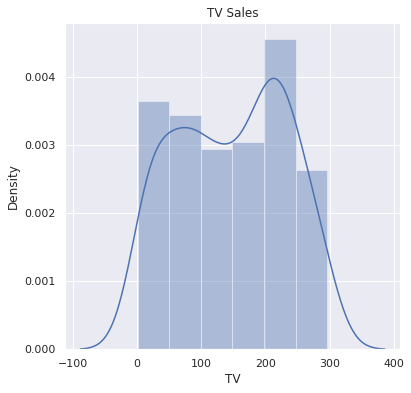

In [23]:
# TV
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(sales_dataset['TV'])
plt.title('TV Sales')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


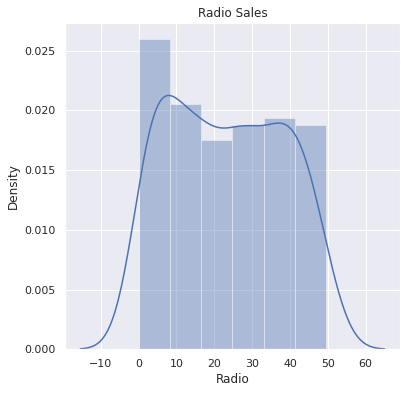

In [28]:
# Radio
plt.figure(figsize = (6,6))
sns.distplot(sales_dataset['Radio'])
plt.title('Radio Sales')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


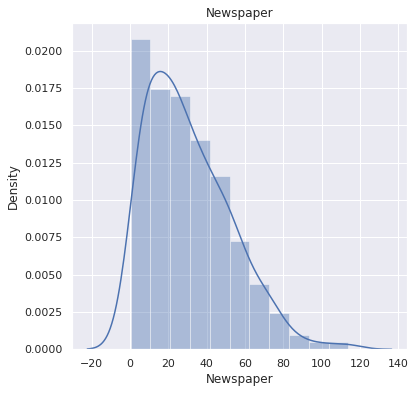

In [29]:
# Newpaper
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(sales_dataset['Newspaper'])
plt.title('Newspaper')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


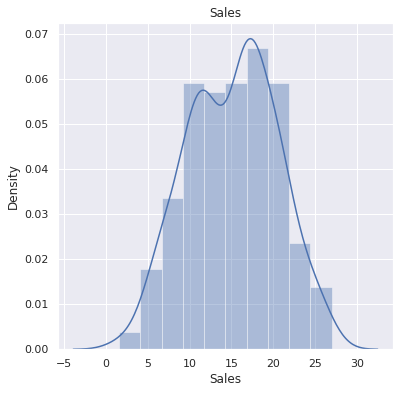

In [30]:
# Sales
sns.set()
plt.figure(figsize = (6, 6))
sns.distplot(sales_dataset['Sales'])
plt.title('Sales')
plt.show()

**Splitting the features and target**

In [31]:
X = sales_dataset.drop(columns = 'Sales', axis = 1)
Y = sales_dataset['Sales']

In [32]:
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [33]:
print(Y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


**Splitting training data and testing data**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2) 

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(200, 3) (160, 3) (40, 3)


**Model Training**

In [37]:
# loading the linear regression model
model = LinearRegression()

In [38]:
model.fit(X_train, Y_train)

LinearRegression()

**Model Evaluation**

In [41]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [48]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Value : ', r2_train)

R Squared Value :  0.9120706464620405


In [44]:
# prediction on testing data
testing_data_prediction = model.predict(X_test)

In [47]:
# R squared value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R Squared Value : ', r2_test)

R Squared Value :  0.8407131803267819


In [55]:
input_data = (230.1,37.8,69.2)

In [56]:
# changing the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [57]:
# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

In [59]:
prediction = model.predict(input_data_reshaped)
print(prediction)

[21.29072756]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [61]:
print('The sales is ', prediction[0])

The sales is  21.29072756191941
